In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [132]:
# Generowanie danych

cov = np.array([[4,0],[0,4]])

n1 = 40
mean_1 = np.array([-3,-1])
C1 = np.random.multivariate_normal(mean_1, cov, n1)
y1 = np.ones(n1)

n2 = 30
mean_2 = np.array([2,2])
C2 = np.random.multivariate_normal(mean_1, cov, n2)
y2 = np.full(n2,2)

data = np.r_[C1,C2]
target = np.hstack((y1,y2))

In [133]:
# Skalowanie danych

scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [134]:
# klasyfikator jest trenowany na calym zbiorze 
# stosujemy powtorne podstawienie tj. PT = PU

acc_rate = []
TN_rate = []
TP_rate = []

for i in range(1,22):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_data,target)
    pred = knn.predict(scaled_data)
    acc_rate.append(accuracy_score(target,pred))
    TP_rate.append(confusion_matrix(target,pred)[0,0])
    TN_rate.append(confusion_matrix(target,pred)[1,1])

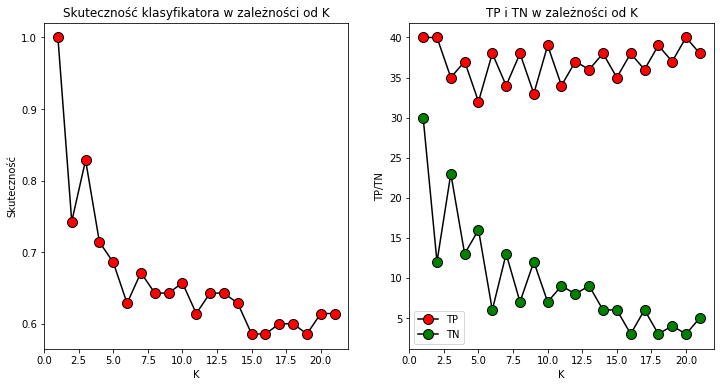

In [135]:
# wykresy

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(range(1,22),acc_rate,color='black', linestyle='-', marker='o',
         markerfacecolor='red', markersize=10)
ax[0].set_title('Skuteczność klasyfikatora w zależności od K')
ax[0].set_xlabel('K')
ax[0].set_ylabel('Skuteczność')

ax[1].plot(range(1,22),TP_rate,color='black', linestyle='-', marker='o',
         markerfacecolor='red', markersize=10,label="TP")
ax[1].plot(range(1,22),TN_rate,color='black', linestyle='-', marker='o',
         markerfacecolor='green', markersize=10,label="TN")
ax[1].set_title('TP i TN w zależności od K')
ax[1].set_xlabel('K')
ax[1].set_ylabel('TP/TN')
ax[1].legend()

plt.show()

#### Klasyfikator osiągnął najlepszą skuteczność dla k = 1 i im większe k tym skuteczność spada aż do momentu, w którym wydaje się, że osiągnał stabliny poziom około 0,6. Na drugim wykresie z kolei widać, ze wartości TP oscylują cały czas na poziomie 35-40 a TN spada im większe jest k. Oczywiście wartości TN i TP oznaczają odpowiednio: ilość punktów z klasy 1 zaklasyfikowanych do klasy 1 oraz ilość punktów z klasy 2 zaklasyfikowanych do klasy 2. Tak więc w tym przypadku TP maksymalnie osiąga wartość 40 a TN 30.

In [145]:
# wygenrowanie 10 punktow z klasy 1 i 5 z klasy 2 jako zbior testowy

X_test = np.r_[np.random.multivariate_normal(mean_1, cov, 10),np.random.multivariate_normal(mean_2, cov, 5)]
y_test = np.hstack((np.ones(10),np.full(5,2)))

In [146]:
scaler2= StandardScaler()
scaler2.fit(X_test)
scaled_data2= scaler.transform(X_test)

In [147]:
acc_rate2 = []
TP_2 = []
TN_2 = []

for i in range(1,22):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_data,target)
    pred = knn.predict(scaled_data2)
    acc_rate2.append(accuracy_score(y_test,pred))
    TP_2.append(confusion_matrix(y_test,pred)[0,0])
    TN_2.append(confusion_matrix(y_test,pred)[1,1])

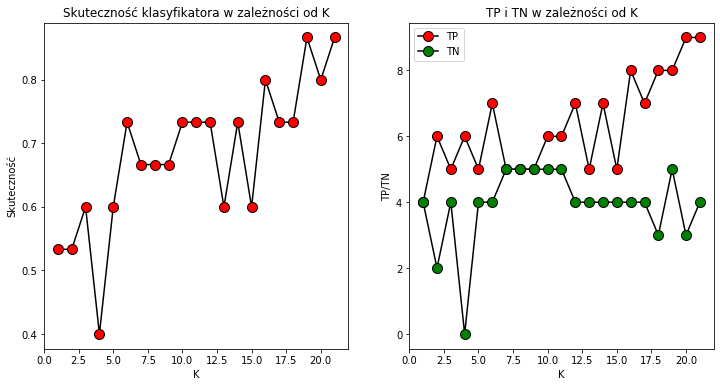

In [148]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(range(1,22),acc_rate2,color='black', linestyle='-', marker='o',
         markerfacecolor='red', markersize=10)
ax[0].set_title('Skuteczność klasyfikatora w zależności od K')
ax[0].set_xlabel('K')
ax[0].set_ylabel('Skuteczność')

ax[1].plot(range(1,22),TP_2,color='black', linestyle='-', marker='o',
         markerfacecolor='red', markersize=10,label="TP")
ax[1].plot(range(1,22),TN_2,color='black', linestyle='-', marker='o',
         markerfacecolor='green', markersize=10,label="TN")
ax[1].set_title('TP i TN w zależności od K')
ax[1].set_xlabel('K')
ax[1].set_ylabel('TP/TN')
ax[1].legend()

plt.show()

#### W tym przypadku widać z kolei, że wartość skuteczności klasyfikatora rośnie przy większej ilości k i. Tak samo dzieje się w przypadku wartości TP. TN natomiast mniej więcej cały czas osiąga wartośc około 4. Analogicznie jak na poprzednich wykresach, TP oznacza ilośc punktów z klasy 1 zaklasyfikowanych do klasy 1 przy czym maksamalna wartośc to 10 a TN oznacza ilośc punktów z klasy 2 zaklasyfikowanych do klasy 2 przy czym maksamalna wartośc to 5.